In [1]:
#!pip install tensorflow


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import sklearn
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
%matplotlib inline 
display(HTML("<style>.container { width:100% !important; }</style>"))

C:\Users\cappr\AppData\Local\Temp\ipykernel_16320\488384202.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('creditcard.csv')
print(df.head())
df.shape

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20 

(284807, 31)

In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

[0.06751182 0.03448276 0.03448276]


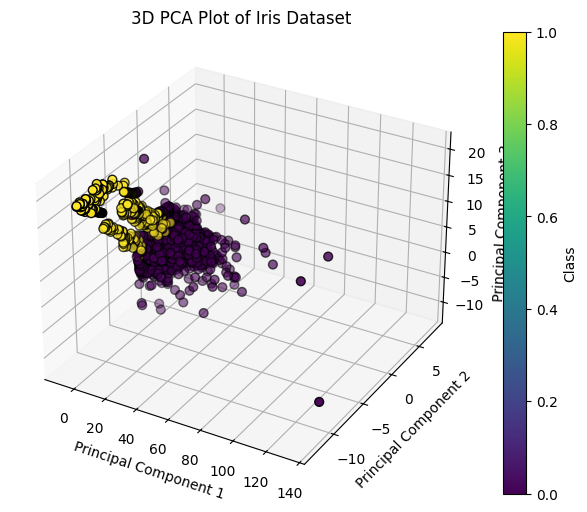

In [5]:
import sklearn
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D 
def show_pca_df(df):
    x = df[df.columns[1:30]].to_numpy()
    y = df[df.columns[30]].to_numpy()

    x = sklearn.preprocessing.StandardScaler().fit_transform(x)
    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(x)
    print(pca.explained_variance_ratio_)

    pca_df = pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
    pca_df = pd.concat([pca_df, pd.DataFrame({'label': y})], axis=1)

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(pca_df['pc_1'], pca_df['pc_2'], pca_df['pc_3'], c=y, cmap='viridis', edgecolor='k', s=40)

    ax.set_title('3D PCA Plot of Iris Dataset')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')

    # Add a colorbar
    colorbar = plt.colorbar(scatter, ax=ax, orientation='vertical')
    colorbar.set_label('Class')

    plt.show()
    
show_pca_df(df)

[0.21544368 0.05797761 0.0514828 ]


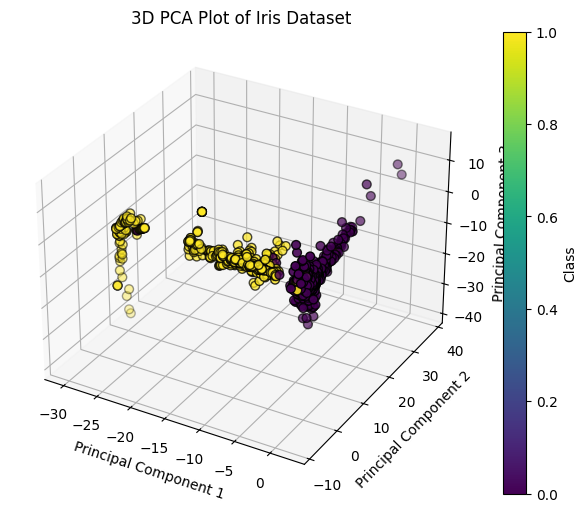

In [6]:
df_anomaly = df[df[df.columns[30]] > 0]
df_normal = df[df[df.columns[30]] == 0].sample(n=df_anomaly.size, random_state=1, axis='index')
df2 = pd.concat([ df_anomaly, df_normal])

show_pca_df(df2)

In [7]:
X = df[df.columns[1:30]]
print(len(X))
y = df[df.columns[30]]
pd.Series(y).value_counts()

284807


Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

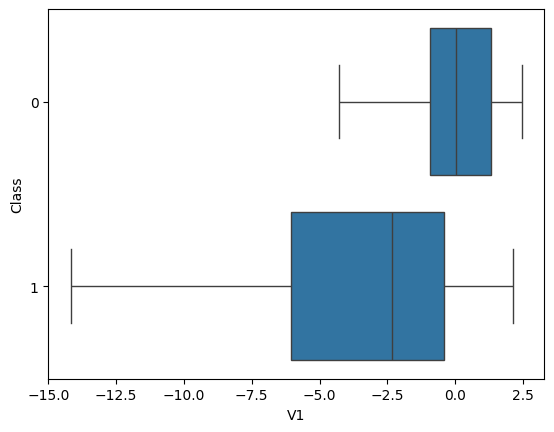

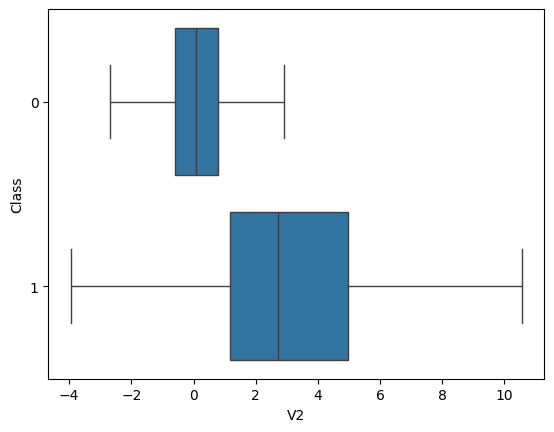

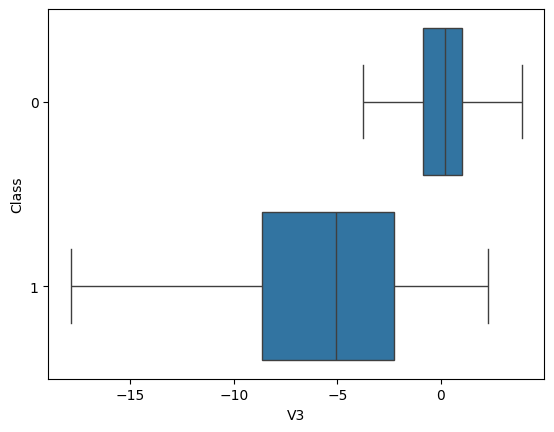

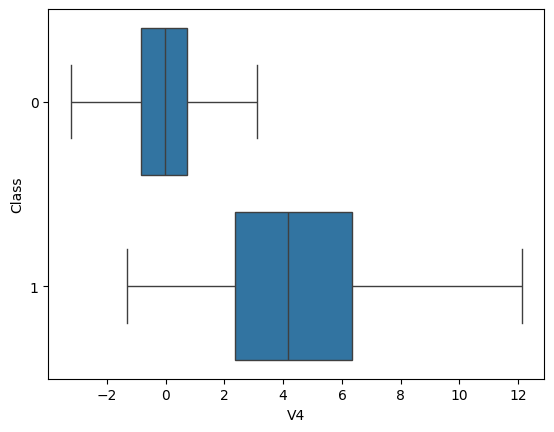

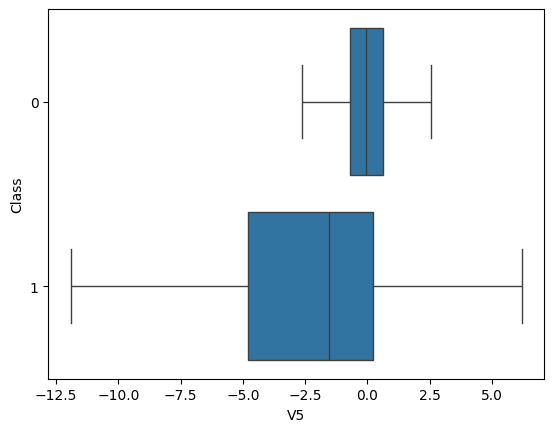

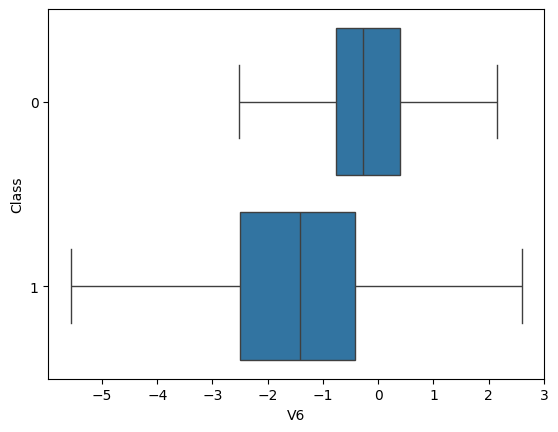

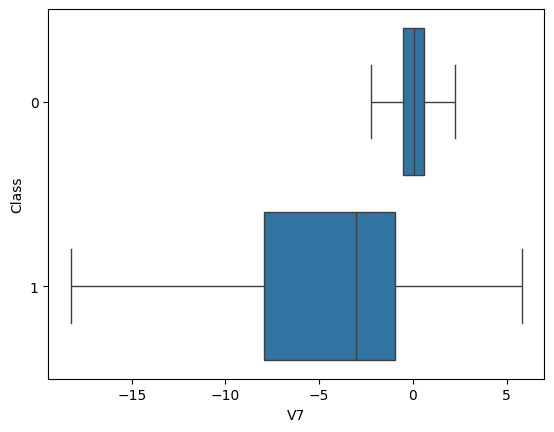

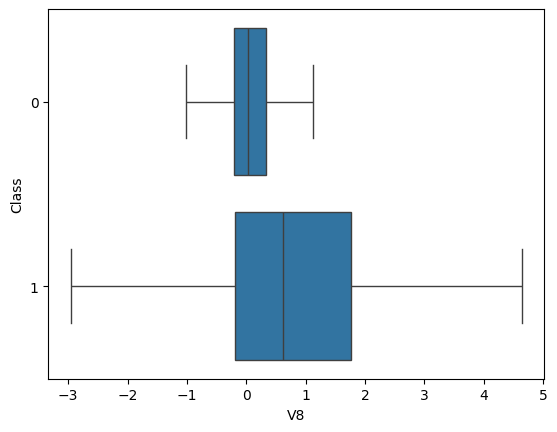

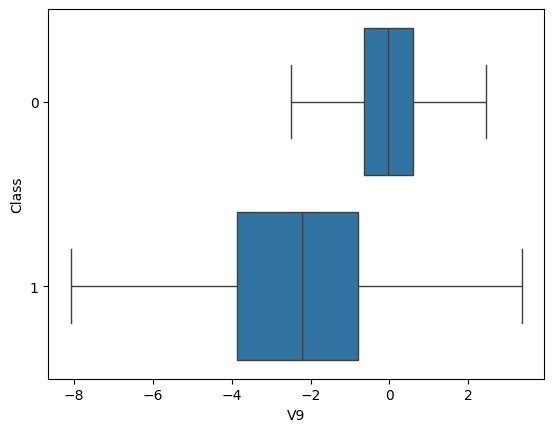

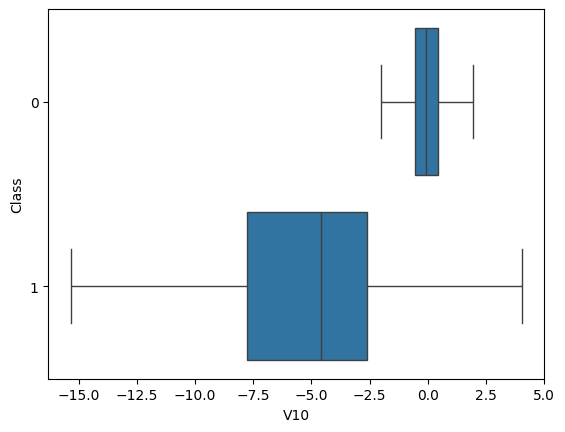

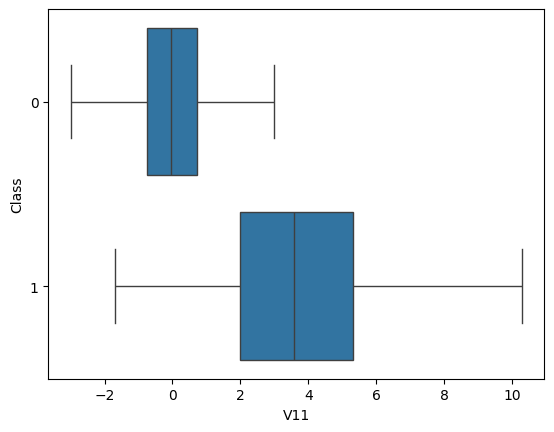

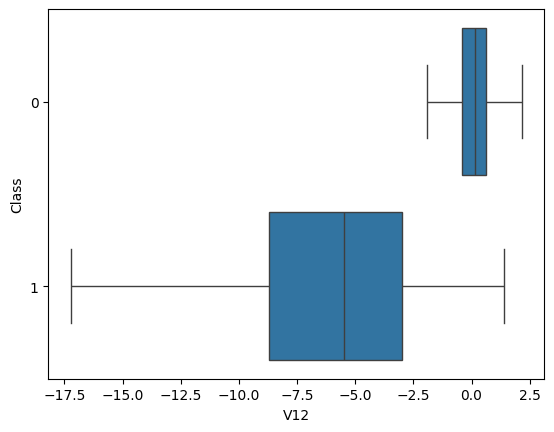

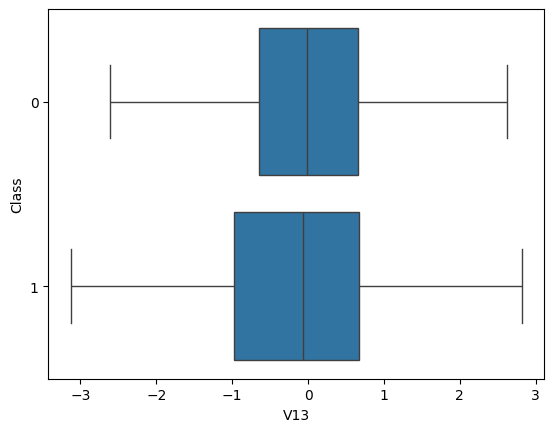

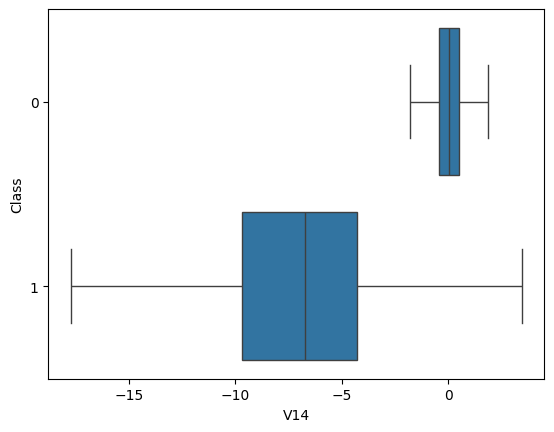

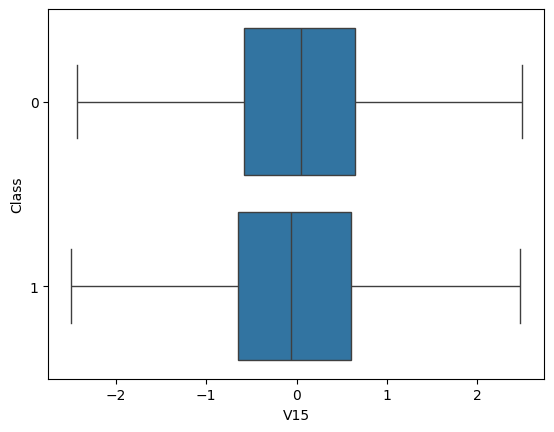

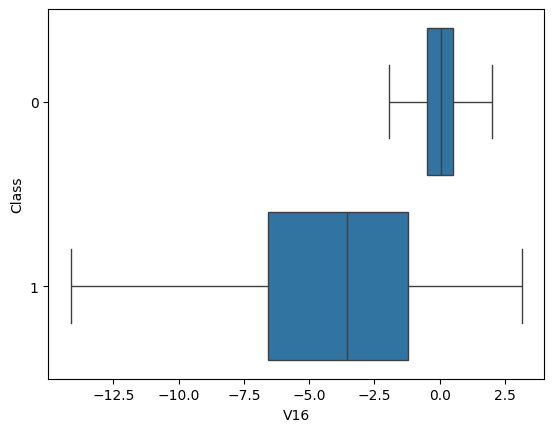

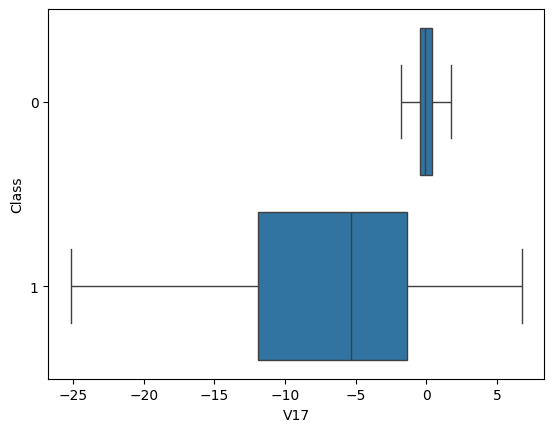

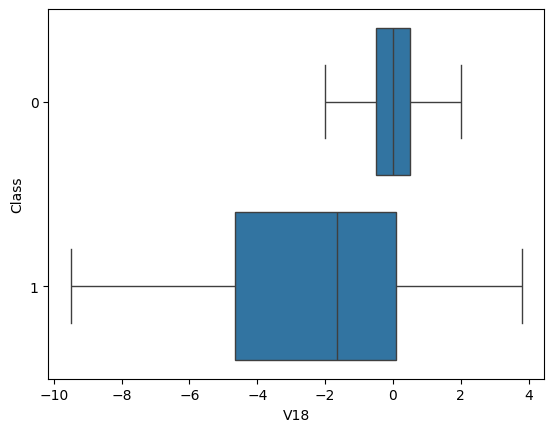

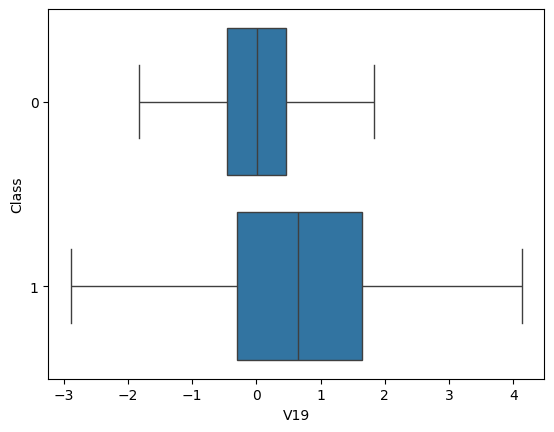

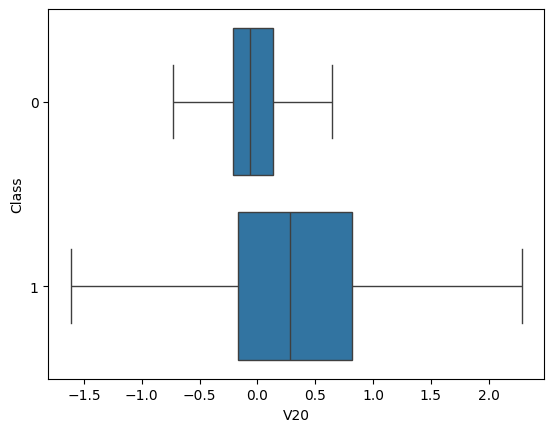

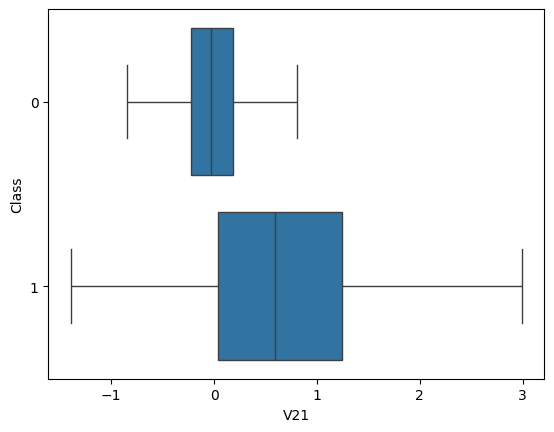

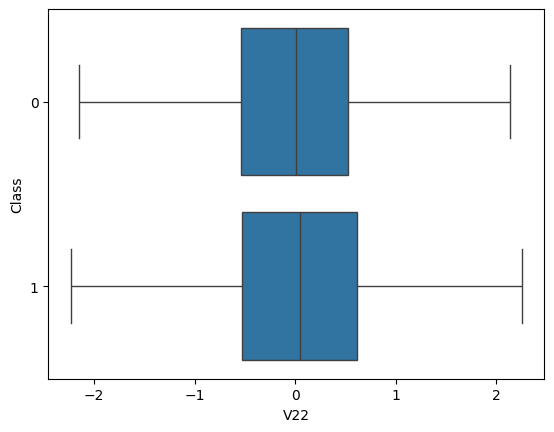

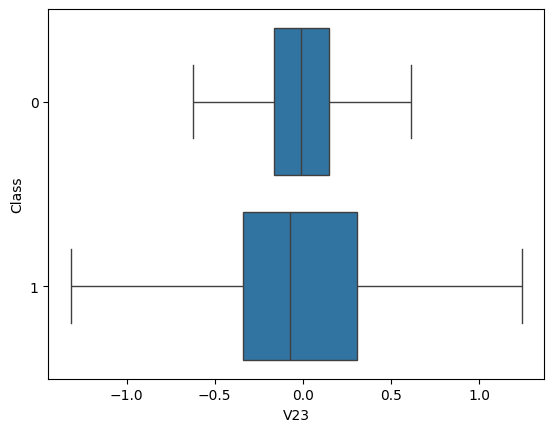

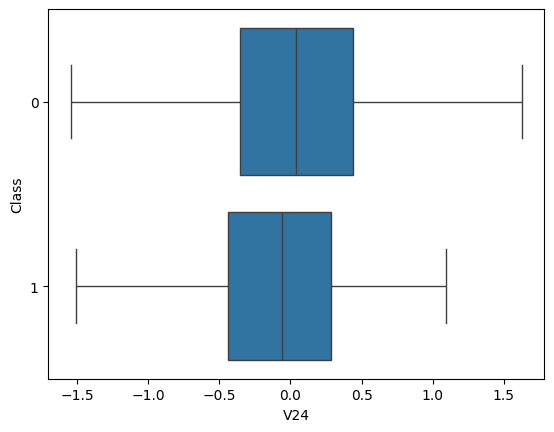

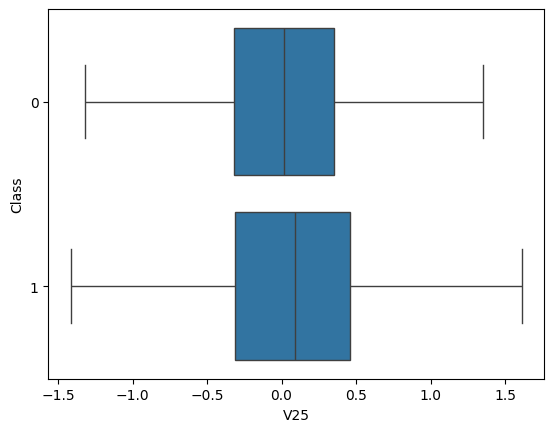

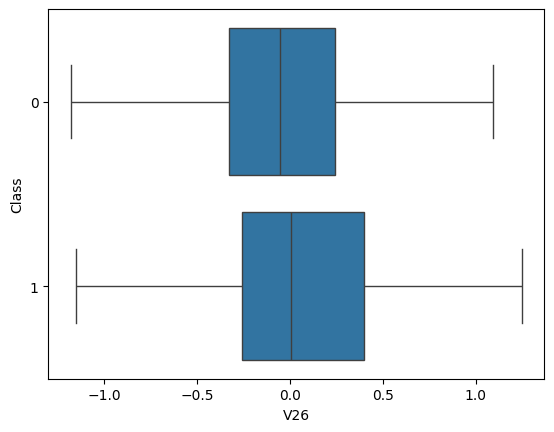

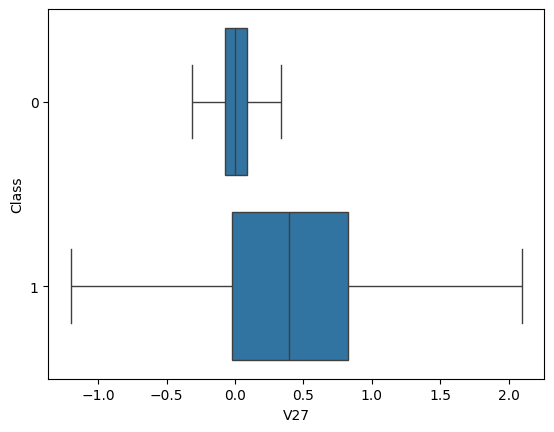

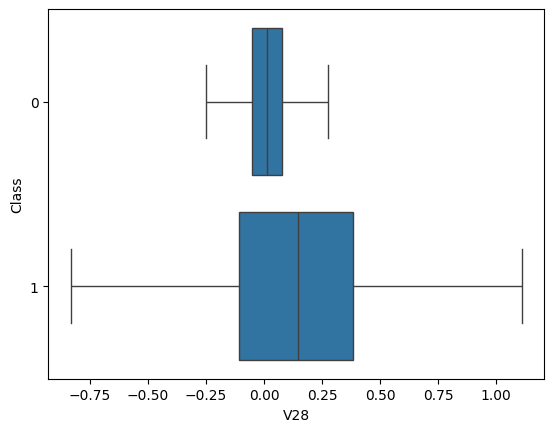

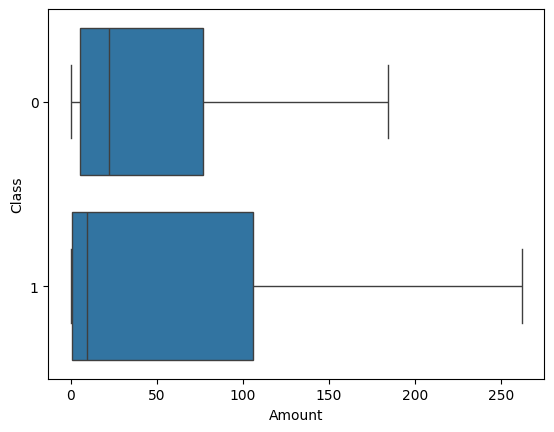

In [9]:
import seaborn as sns
for c in X.columns:
    sns.boxplot( x=X[c],y=y, orient='h',showfliers = False)
    plt.show()

In [10]:
train_cols = list(set(['V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V16', 'V17'] + ['V1', 'V4', 'V5', 'V8', 'V10', 'V12', 'V14', 'V17', 'V21']))

In [11]:
from sklearn.model_selection import train_test_split
X, test, y, y_test = train_test_split(X, y, stratify=y, test_size=.15)
#scaler = sklearn.preprocessing.MinMaxScaler()
scaler = sklearn.preprocessing.RobustScaler()
#scaler = sklearn.preprocessing.StandardScaler()
X  = pd.DataFrame(scaler.fit_transform(X[train_cols]), columns=train_cols)
test = pd.DataFrame(scaler.transform(test[train_cols]), columns=train_cols)
X.shape

(242085, 13)

In [12]:
test.describe()

,V13,V17,V8,V10,V16,V9,V1,V4,V12,V21,V5,V14,V11
count,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000,42722.000000
mean,0.013880,0.071884,-0.046003,0.094461,-0.065544,0.035107,-0.010132,0.011501,-0.136289,0.081340,0.047020,-0.051080,0.017483
std,0.756666,0.975798,2.164252,1.091022,0.883210,0.880810,0.867477,0.888652,0.978297,1.765857,1.034659,1.033975,0.676542
min,-2.835193,-27.089428,-69.851191,-22.340368,-12.588462,-7.592081,-18.757031,-3.559132,-18.386364,-38.873833,-16.911674,-16.888187,-3.173672
25%,-0.478880,-0.469544,-0.436729,-0.444765,-0.530430,-0.483651,-0.419173,-0.519746,-0.533511,-0.481834,-0.489279,-0.521537,-0.487677
50%,0.000229,-0.001656,-0.000706,0.001075,0.003649,-0.006617,-0.006917,-0.000711,-0.000012,-0.001849,0.004129,0.003508,-0.004279
75%,0.516073,0.524712,0.574610,0.559593,0.458973,0.519631,0.579346,0.482182,0.466633,0.512522,0.521372,0.486075,0.513732
max,2.902051,8.682386,29.475599,14.059871,6.423165,7.519151,1.072331,7.508067,4.331021,65.585503,22.450150,8.302438,6.804819


In [13]:
from sklearn.feature_selection import SelectKBest, chi2,SelectFromModel
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import sklearn
for v in [sklearn.svm.LinearSVC(), LogisticRegression(penalty="l2"),]:
    kb = SelectFromModel(v) 
    kb.fit(X, y)
    print(X.columns[kb.get_support(True)])

Index(['V17', 'V10', 'V16', 'V4', 'V14'], dtype='object')
Index(['V13', 'V10', 'V16', 'V4', 'V14'], dtype='object')


In [14]:
train_cols = X.columns

In [15]:
len(train_cols)

13

In [16]:
import keras
from keras import layers

input_s = layers.Input(shape=(X.shape[1],))
encoded = layers.Dense(20, activation='relu')(input_s)
encoded = layers.Dropout(.5)(encoded)
encoded = layers.Dense(10, activation='relu')(encoded)
encoded = layers.Dropout(.5)(encoded)

coded = layers.Dense(5, activation='relu')(encoded)

decoded = layers.Dense(10, activation='relu')(encoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(20, activation='relu')(decoded)
decoded = layers.Dropout(.5)(decoded)
decoded = layers.Dense(X.shape[1])(decoded)

autoencoder = keras.Model(input_s, decoded)
autoencoder.compile(
  loss='mse',
  optimizer='adam',
  metrics=['mse'])

autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 13)                  │             273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,093 (4.27 KB)

 Trainable params: 1,093 (4.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 1.3568 - mse: 1.3568 - val_loss: 1.1472 - val_mse: 1.1472
Epoch 2/20
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 1.1534 - mse: 1.1534 - val_loss: 1.1092 - val_mse: 1.1092
Epoch 3/20
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1.1291 - mse: 1.1291 - val_loss: 1.0782 - val_mse: 1.0782
Epoch 4/20
7566/7566 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 1.0855 - mse: 1.0855 - val_loss: 1.0829 - val_mse: 1.0829


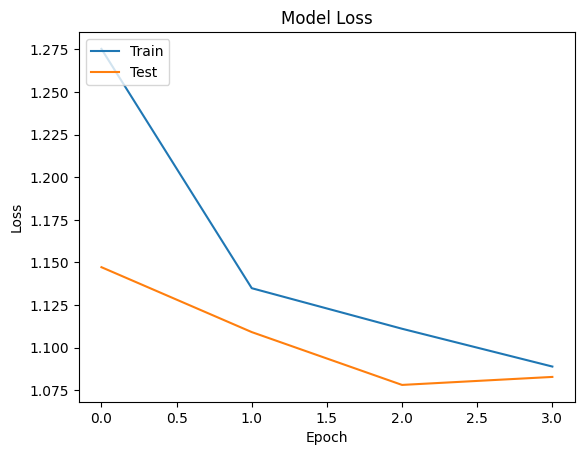

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
history = autoencoder.fit(x=X, y=X, epochs=20, verbose=1, validation_data=(test, test), callbacks=[es])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
train_predicted_x = autoencoder.predict(x=X)
train_events_mse = keras.losses.mean_squared_error(X, train_predicted_x)
cut_off = np.percentile(train_events_mse, 99)
print(cut_off)

7566/7566 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step
10.94170471191407


In [19]:
np.where(train_events_mse == pd.Series(train_events_mse).max())

(array([180082], dtype=int64),)

In [20]:
tmp = pd.DataFrame(X.values[2])

In [21]:
results =  autoencoder.predict(tmp.values.reshape(1,-1))
keras.losses.mean_squared_error(results, tmp.values.reshape(1,-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


<tf.Tensor: shape=(1,), dtype=float64, numpy=array([3.01601774])>

In [22]:
pd.Series(train_events_mse).describe()

count    242085.000000
mean          1.098372
std           5.726385
min           0.036950
25%           0.321980
50%           0.510385
75%           0.881085
max         920.662231
dtype: float64

In [23]:
len(y_test)
test # = test.drop(columns=['Target'])

,V13,V17,V8,V10,V16,V9,V1,V4,V12,V21,V5,V14,V11
0,0.718449,0.446328,1.015440,-1.278123,-0.256152,0.386575,-0.547436,-0.470282,1.069803,-0.086073,-0.591221,-0.733272,-0.287210
1,0.555288,0.246951,0.185421,1.702967,-0.058176,-0.656090,0.893642,-0.888615,0.039393,-0.003300,-1.589562,-0.867579,0.521636
2,1.117136,-0.507874,0.718850,-0.918406,0.310156,0.071943,-0.414474,-0.384062,0.574235,0.944466,-0.157704,-0.436512,-0.772634
3,-0.529244,1.052475,1.825432,0.474749,-0.994341,0.264147,0.396423,1.588945,0.865159,0.467868,0.167534,-0.415209,0.635461
4,-0.765922,-0.476827,0.518912,0.052090,0.443029,0.726387,0.508071,0.440683,0.320047,-0.103701,-0.699240,-0.080213,0.347830
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42717,-0.567995,0.297012,1.813716,0.173208,1.719296,-1.278551,-0.733192,-1.175657,-0.337530,0.098682,-0.972841,0.588951,0.745736
42718,-0.160126,0.105715,-0.144480,-0.417870,0.336169,-0.237883,-0.170709,0.058602,-0.392845,-0.561847,0.034878,-0.446693,-0.158567
42719,-0.250690,0.032242,-2.514314,0.329051,-0.095487,-0.138214,-0.039710,0.834666,0.651571,4.406270,-0.473799,0.517528,1.089860
42720,-0.379289,-0.294039,1.658548,-1.182825,0.618811,0.018479,-0.955874,-0.539365,0.447579,0.659190,-0.056451,0.198409,0.440825


In [24]:
test.head()

,V13,V17,V8,V10,V16,V9,V1,V4,V12,V21,V5,V14,V11
0,0.718449,0.446328,1.015440,-1.278123,-0.256152,0.386575,-0.547436,-0.470282,1.069803,-0.086073,-0.591221,-0.733272,-0.287210
1,0.555288,0.246951,0.185421,1.702967,-0.058176,-0.656090,0.893642,-0.888615,0.039393,-0.003300,-1.589562,-0.867579,0.521636
2,1.117136,-0.507874,0.718850,-0.918406,0.310156,0.071943,-0.414474,-0.384062,0.574235,0.944466,-0.157704,-0.436512,-0.772634
3,-0.529244,1.052475,1.825432,0.474749,-0.994341,0.264147,0.396423,1.588945,0.865159,0.467868,0.167534,-0.415209,0.635461
4,-0.765922,-0.476827,0.518912,0.052090,0.443029,0.726387,0.508071,0.440683,0.320047,-0.103701,-0.699240,-0.080213,0.347830


In [25]:
predicted = autoencoder.predict(x=test)
ms =  keras.losses.mean_squared_error(test, predicted)

test_df = pd.DataFrame(test.copy(), columns=test.columns)
print(test_df.columns)
test_df['Target'] = y_test.values
test_df['MSE'] = ms
test_df['Outlier'] = test_df['MSE'] > cut_off
test_df['Outlier'].value_counts()

1336/1336 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step
Index(['V13', 'V17', 'V8', 'V10', 'V16', 'V9', 'V1', 'V4', 'V12', 'V21', 'V5',
       'V14', 'V11'],
      dtype='object')


Outlier
False    42277
True       445
Name: count, dtype: int64

In [26]:
type(y_test)

pandas.core.series.Series

In [27]:
print(test_df['Target'].value_counts())
print(pd.Series(y_test).value_counts())
test_df['Outlier'].value_counts()

Target
0    42648
1       74
Name: count, dtype: int64
Class
0    42648
1       74
Name: count, dtype: int64


Outlier
False    42277
True       445
Name: count, dtype: int64

In [28]:
test_df['Target'].isnull().value_counts()
pd.Series(y_test).value_counts()
print(test_df.shape)
pd.Series(y_test).value_counts()

(42722, 16)


Class
0    42648
1       74
Name: count, dtype: int64

In [29]:
pd.crosstab(test_df['Target'], test_df['Outlier'], normalize='index')

Outlier,False,True
Target,,
0,0.990621,0.009379
1,0.391892,0.608108


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

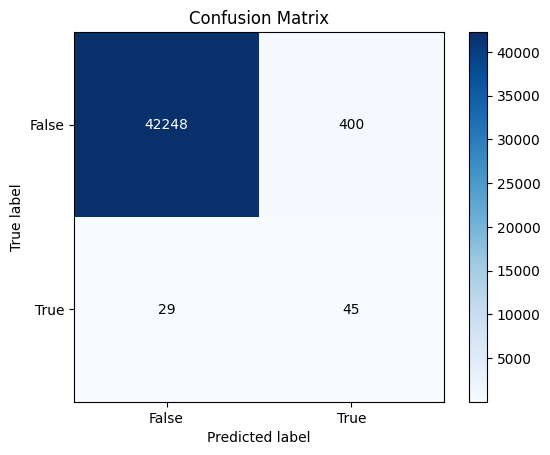

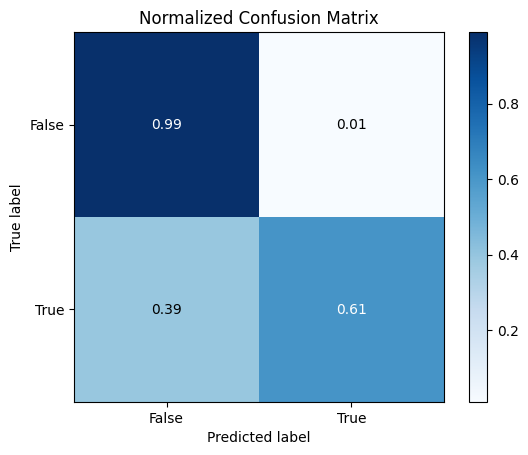

In [30]:
import scikitplot

scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['Outlier'], normalize=True)

In [31]:
df.shape


(284807, 31)

In [32]:
from sklearn.ensemble import IsolationForest
isf = IsolationForest(contamination=.05,random_state=0,n_jobs=7, n_estimators=200)
isf.fit(X)
test_df['outlier2'] = isf.predict(test)
test_df['outlier2'].value_counts()

outlier2
 1    40604
-1     2118
Name: count, dtype: int64

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

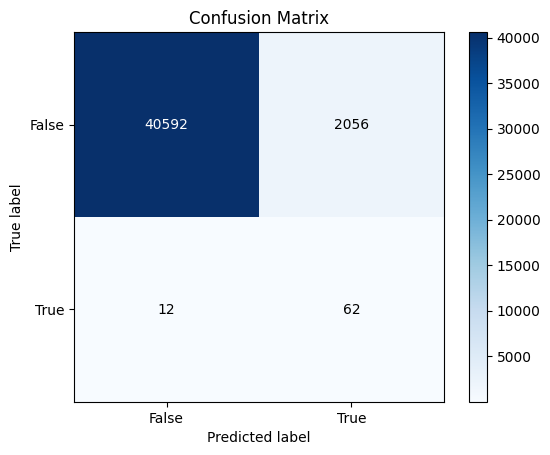

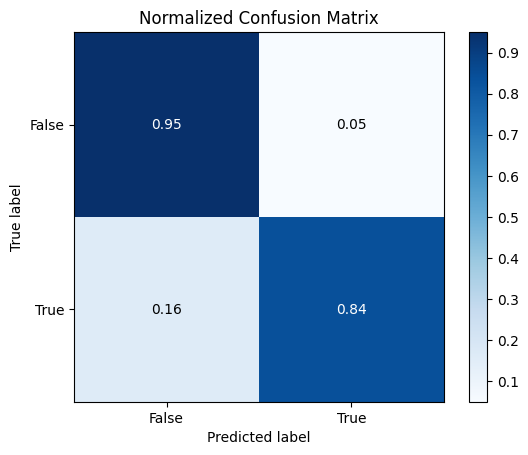

In [33]:
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=False)
scikitplot.metrics.plot_confusion_matrix(test_df['Target'] == 1,test_df['outlier2'] == -1, normalize=True)